### 機械学習で使いそうな `計算` を python で実装する ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 平均二乗誤差関数 ####

誤差関数の一種。一番基礎的なもの。

$$ \frac{1}{N}\sum_{N=1}^{N} (y_n - t_n)^2 $$

$$ y_n : 予測値 $$
$$ t_n : 実測値 $$

予測値と実測値の誤差の平均をとる。
二乗しているのは、絶対値的な距離として誤差を算出するため。

この誤差関数の値が `小さい` = `誤差が少ない` という事なので、Jが最小になる、関数yのパラメータを探索する必要がある。
パラメータの探索には勾配法などの、 `数値解` と 式を解く `解析解`が存在する

また、平均二乗誤差は平方根を取ると元のスケールに戻すことができる。
すると誤差の平均をとっていることになるので、 `標準偏差` になる。

In [2]:
# 二乗誤差関数
def mse_func(y, t):
    return np.mean(np.square(y - t))

# スカラーの場合
print(mse_func(1, 4))

# ベクトルの場合
y = np.array([1, 2])
t = np.array([2, 4])
print(mse_func(y, t))

9.0
2.5


#### シグモイド関数 ####
　標準正規分布を微分した関数。
 取る値は必ず 0 ~ 1 の範囲に収まる。
 そのため、出力で確率を表す時などに使われる。

$$ y=\frac{1}{1+exp(x)} $$

xの値が

    負の場合 → 0.5 < 0
    
    正の場合 → 0.5 > 0
    
    0の場合 → 0
    
となる。
この関数は、exp(x) の性質上、1 や 0　に収束することはない。

In [3]:
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

print(sigmoid_func(-1))
print(sigmoid_func(0))
print(sigmoid_func(1))

0.2689414213699951
0.5
0.7310585786300049


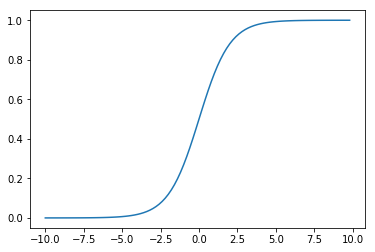

In [4]:
# -10 < x < 10 の範囲で、グラフに描画してみる

x = list(np.arange(-10, 10, 0.2))
y = [sigmoid_func(i) for i in x]

plt.plot(x, y)
plt.show()

#### ソフトマックス関数 ####
複数の出力の合計が1になる関数。

主に、確率を求めるために使われる。

$$ u = exp(x_1) + exp(x_2) + exp(x_3) $$

$$ y_1 = \frac{exp(x_1)}{u}, y_2 = \frac{exp(x_2)}{u}, y_3 = \frac{exp(x_3)}{u} $$

一般化をすると

$$ y_i = \frac{exp(x_i)}{\sum_{K=1}^{j} exp(x_j)} $$


ソフトマックス関数に x0 = 0 と　任意の値を取れる x1 を入力するとシグモイド関数を算出することができる。

In [57]:
def softmax_func(X):
    u = np.sum(np.exp(X))
    return np.exp(X) / u

X = np.random.rand(5) * 1
print(X)
print(softmax_func(X))
print(np.sum(softmax_func(X)))

[0.81430121 0.87617565 0.39896445 0.5377121  0.42118081]
[0.24054304 0.2558966  0.15878677 0.18241967 0.16235392]
1.0
